In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls "/content/drive/My Drive/big_data_final_project/model_csv/MFImp_a40r200_reg1_it20/"
path = "/content/drive/My Drive/big_data_final_project/model_csv/MFImp_a40r200_reg1_it20/"

itemFactors.csv			     sub_item_features_embeded_array_umap.npy
item_features_array.npy		     subsample_data.csv
sub_item_features_array.npy	     userFactors.csv
sub_item_features_embeded_array.npy


In [6]:
data = pd.read_csv(path+'itemFactors.csv')

In [ ]:
data['features'][0]

'[0.043486048, -0.018726699, 0.010894386, -0.015311421, 0.0029554472, -0.05480359, 0.023451261, -0.009627425, -0.02584354, 0.05096481, -0.07564186, 0.021248272, -0.03673087, 0.018679231, -0.027712395, -0.004848157, 0.060604293, 0.057799477, 0.052086275, 0.0056723645, 0.018710515, 0.06440029, -0.025358798, -0.004103954, -0.042565424, -0.02870551, 0.0094787935, -0.005765835, -0.017321635, -0.09297161, 0.11037405, -0.037835613, -0.10572649, -0.041719437, -0.09915493, -0.05097296, 0.10470261, 0.094828546, 0.056374855, 0.07102459, 0.022570914, 0.016052576, 0.021338725, 0.041979834, -0.026528269, 0.016470846, -0.029150529, 0.007230866, -0.03903677, -0.08792771, 0.071341924, 0.007801221, 0.009547396, -0.005121331, 0.018512757, 0.14838885, -0.0354197, -0.0011246356, 0.020361813, -0.05854785, -0.046263877, -0.031559747, -0.058484763, -0.0017353677, 0.098447114, -0.12914298, -0.0031881074, 0.039008055, 0.016882313, -0.022601781, -0.01730123, -0.06577442, 0.1131738, -0.08121514, 0.012165079, 0.06

In [ ]:
#convert str of list to list
from ast import literal_eval
data.features = data.features.apply(literal_eval)

In [ ]:
#convert list to np array and them concatenate them into a large array
features = data['features'].apply(np.array)

In [ ]:
m, n = len(features), len(features[0])
features_array = np.zeros((m,n))
for i in range(m):
    features_array[i,:] = features[i]

In [ ]:
features_array

array([[ 4.3486048e-02, -1.8726699e-02,  1.0894386e-02, ...,
         9.1936890e-03,  1.7287980e-02,  4.5431655e-02],
       [-2.6954130e-03,  6.4265450e-04,  1.0782615e-03, ...,
        -8.0807060e-05,  6.0783066e-03,  6.6067830e-03],
       [ 4.7064710e-04,  4.9237940e-05,  1.0582247e-03, ...,
         3.1233372e-04, -5.6646690e-04,  8.8324440e-03],
       ...,
       [-4.9307850e-03, -2.3866036e-04,  5.5025570e-03, ...,
        -9.3104210e-03,  1.2161827e-03,  3.9463295e-03],
       [ 4.6064455e-02,  7.1116190e-02, -1.2769953e-02, ...,
        -3.5037298e-04,  3.5242796e-02, -1.8414082e-02],
       [ 3.6126170e-04,  1.3494166e-02, -1.5264416e-02, ...,
        -2.5517153e-04,  9.0324655e-03,  1.4276038e-02]])

In [ ]:
np.save(path+'item_features_array.npy', features_array)

In [4]:
features_array = np.load(path+'item_features_array.npy')

In [ ]:
# use TSNE to reduce dimension
from sklearn.manifold import TSNE
features_embeded = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_array)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 385371 samples in 21.703s...


In [7]:
#subsample data to train TSNE
data_sub = data.sample(n=10000, random_state = 123)
#data_sub.to_csv(path+'subsample_data.csv')

In [3]:
data_sub = pd.read_csv(path+'subsample_data.csv')

In [16]:
data_sub.head

<bound method NDFrame.head of       Unnamed: 0      id                                           features
0         277259   75217  [-0.0012530572, 3.9627665E-4, 0.011239643, 5.4...
1         356680   98769  [-0.006298014, -0.003287865, -0.0103872875, -0...
2         348264   14409  [0.0031295144, -0.025223492, -0.0019629563, 5....
3         273492   37497  [0.0059033423, -0.010399347, -0.0013570067, -0...
4          47521   90101  [0.029110406, 0.05143798, -0.027472636, 0.0390...
...          ...     ...                                                ...
9995       20878  209290  [0.012033554, -0.022721214, -0.035340115, -0.0...
9996      156622   24674  [0.010757706, -0.018924018, -0.007493327, -0.0...
9997       63238  247561  [-8.231057E-4, -0.006581576, 0.008782728, 0.00...
9998       64614  261371  [0.0032477614, 0.0045900554, 0.0051795198, -0....
9999      150115  345663  [0.006573977, 0.035442475, -0.011930287, 0.033...

[10000 rows x 3 columns]>

In [18]:
#convert str of list to list
from ast import literal_eval
data_sub.features = data_sub.features.apply(literal_eval)
features = data_sub['features'].apply(np.array)
m, n = len(features), len(features[0])
features_array = np.zeros((m,n))
for i in range(m):
    features_array[i,:] = features[i]

In [4]:
# np.save(path+'sub_item_features_array.npy', features_array)
features_array = np.load(path+'sub_item_features_array.npy')

In [4]:
from sklearn.manifold import TSNE
features_embeded = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(features_array)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.196s...
[t-SNE] Computed neighbors for 10000 samples in 37.744s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.025564
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.946747
[t-SNE] KL divergence after 300 iterations: 3.769938


In [3]:
# np.save(path+'sub_item_features_embeded_array.npy', features_embeded)
features_embeded = np.load(path+'sub_item_features_embeded_array.npy')

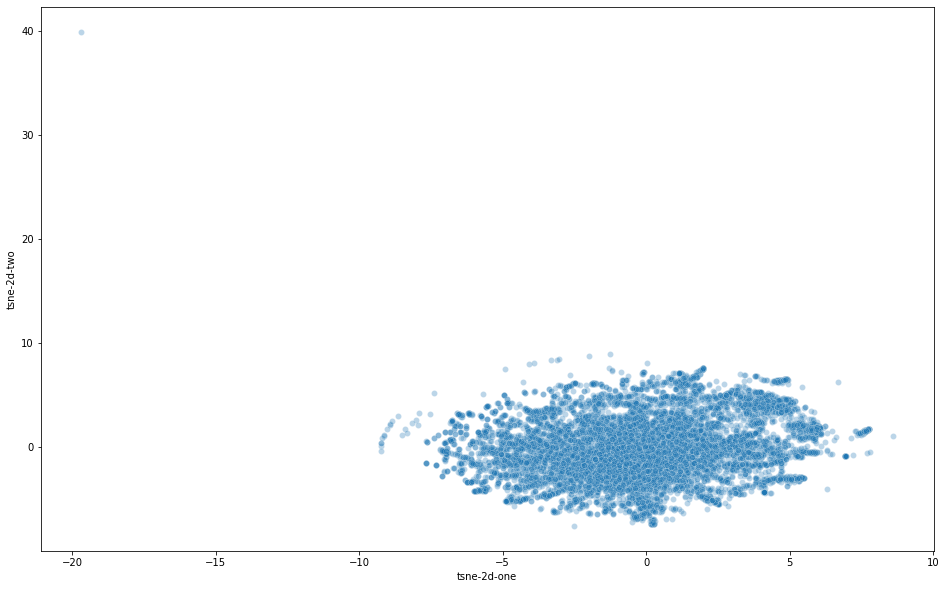

In [10]:
data_sub['tsne-2d-one'] = features_embeded[:,0]
data_sub['tsne-2d-two'] = features_embeded[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=data_sub,
    legend="full",
    alpha=0.3
)

In [6]:
! pip install umap-learn

     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 1.2MB 16.8MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=146170fb00326d4fc8d8d04eae8267538f17e08bfb76d3498e5e46708b8689d2
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=8d31d6609a5baa2feeb19f54d1bf62fcce6cfe3c2d60e5105758faa559b02e2e
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [7]:
import umap.umap_ as umap
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(features_array)

In [45]:
#np.save(path+'sub_item_features_embeded_array_umap.npy', embedding)
embedding = np.load(path+'sub_item_features_embeded_array_umap.npy')

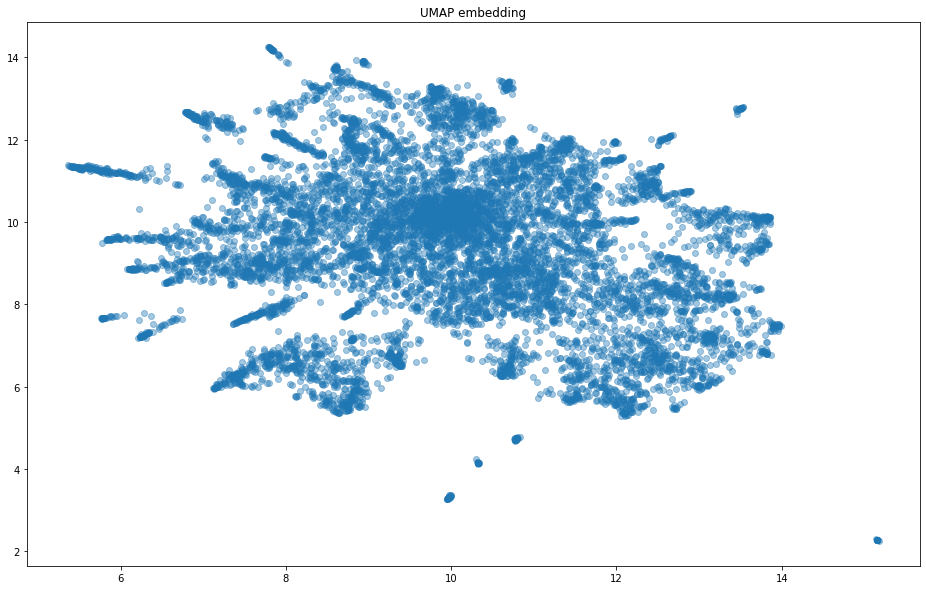

In [11]:
plt.figure(figsize=(16,10))
plt.scatter(embedding[:,0], embedding[:,1], alpha=0.4)
plt.title('UMAP embedding');

## Join feature table to get labels

In [4]:
!ls "/content/drive/My Drive/big_data_final_project/track_features/"
path = "/content/drive/My Drive/big_data_final_project/track_features/"

additional_features_first.csv  merged_all_features.csv
all_features.csv	       selected_feature_release.csv
artist_term.csv		       selected_feature_year.csv
mapped_all_features.csv        track_metadata.csv
mapped_selected_features.csv


In [12]:
features_table = pd.read_csv(path+'mapped_all_features.csv')

In [27]:
#features_table['first_term'] = [features_table['term'][i][0] for i in len(features_table)]
features_table['year'].replace(0, np.nan, inplace=True)
features_table['year'].describe()

count    264477.000000
mean       1999.767923
std           9.634382
min        1922.000000
25%        1996.000000
50%        2003.000000
75%        2007.000000
max        2011.000000
Name: year, dtype: float64

In [13]:
#convert str of list to list
from ast import literal_eval
not_na = features_table['term'].notna()
for i in range(len(features_table)):
    if not_na[i]:
        features_table['term'][i] = literal_eval(features_table['term'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#get the first term 
features_table['first_term'] = [np.nan] * len(features_table)
for i in range(len(features_table)):
    if not_na[i]:
        features_table['first_term'][i] = features_table['term'][i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
features_table['first_term'].describe()

count       385434
unique         657
top       pop rock
freq         12500
Name: first_term, dtype: object

In [22]:
# features_table.to_csv(path+'mapped_all_features.csv')
features_table = pd.read_csv(path+'mapped_all_features.csv')

In [33]:
first_term_table = features_table[['mapped_id','first_term']]

In [38]:
first_term_table = first_term_table.rename(columns={"mapped_id": "id"})

In [40]:
merged_data = data_sub.merge(first_term_table, how = 'left', on = 'id')

In [55]:
merged_data['first_term'].describe()

count         9976
unique         472
top       pop rock
freq           346
Name: first_term, dtype: object

In [52]:
merged_data['umap_1'] = embedding[:,0]
merged_data['umap_2'] = embedding[:,1]

In [2]:
#merged_data.to_csv("/content/drive/My Drive/big_data_final_project/track_features/"+'umap_features_first_term.csv')
merged_data = pd.read_csv("/content/drive/My Drive/big_data_final_project/track_features/"+'umap_features_first_term.csv')

In [3]:
# grouping subgenre into large genre group
for i in range(len(merged_data)):
    if 'pop rock' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'pop rock'
    elif 'hip hop' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'hip hop'
    elif 'rock' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'rock'
    elif 'pop' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'pop music'
    elif 'country' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'country music'
    elif 'soul' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'soul'
    elif 'jazz' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'jazz'
    elif 'blues' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'blues'
    elif 'electr' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'electronic'
    elif 'metal' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'metal'
    elif 'folk' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'folk'
    elif 'raggae' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'raggae'
    else:
        continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Settin

In [4]:
for i in range(len(merged_data)):
    if 'hop' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'hip hop'
    elif 'rap' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'rap'
    elif 'reggae' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'raggae'
    elif 'disco' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'disco'
    elif 'house' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'house'
    elif 'dance' in str(merged_data['first_term'][i]):
        merged_data['first_term'][i] = 'dance'
    else:
        continue


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7

In [5]:
for i in range(len(merged_data)):
    if str(merged_data['first_term'][i]) not in ['rock','pop music','metal','jazz','hip hop','pop rock','house','soul','rap','dance','raggae',
                                                 'ccm','post-grunge','disco','electronic','ballad','country music','blues','folk','chill-out',
                                                 'new wave','chanson']:
        merged_data['first_term'][i] = 'other'
    else:
        continue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
merged_data['first_term'].describe()

count     10000
unique       23
top       other
freq       2772
Name: first_term, dtype: object

In [7]:
term_counts = merged_data['first_term'].value_counts()
for i in range(23):
    print(term_counts.index[i],' ',term_counts[i])

other   2772
rock   2129
pop music   964
metal   722
jazz   519
hip hop   489
pop rock   347
house   273
soul   173
rap   168
dance   166
raggae   139
ccm   126
post-grunge   124
disco   124
electronic   121
ballad   111
country music   98
blues   92
folk   91
chill-out   91
new wave   81
chanson   80


Text(0.5, 1.0, 'UMAP embedding')

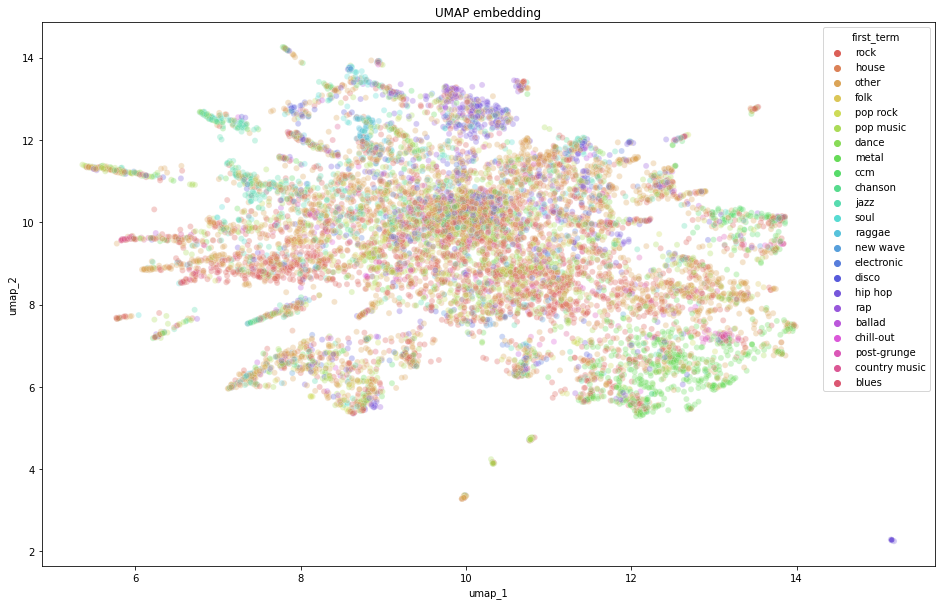

In [8]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap_1", y="umap_2",
    hue="first_term",
    palette=sns.color_palette("hls", 23),
    data=merged_data,
    legend="full",
    alpha=0.3
)
plt.title('UMAP embedding')

In [7]:
#data without others
merged_wo_others = merged_data[merged_data['first_term'] != 'other']

Text(0.5, 1.0, 'UMAP embedding for items')

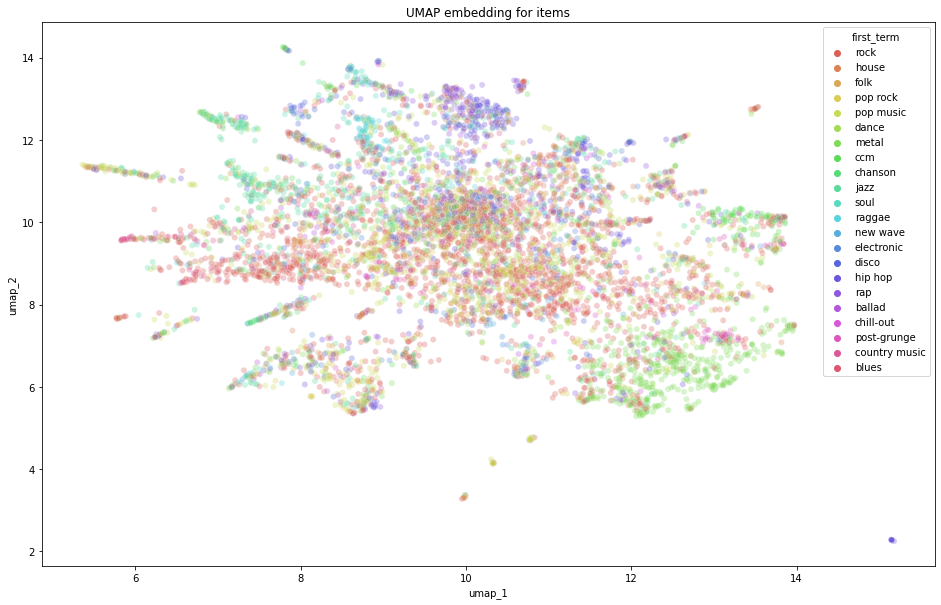

In [8]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap_1", y="umap_2",
    hue="first_term",
    palette=sns.color_palette("hls", 22),
    data=merged_wo_others,
    legend="full",
    alpha=0.3
)
plt.title('UMAP embedding for items')